In [1]:
pip install --quiet torch torchvision captum

Note: you may need to restart the kernel to use updated packages.


In [2]:
# add helpers to NB working path
import sys
sys.path.insert(1, '../')

import helpers, os, pandas

In [3]:
# get metadata

In [4]:
meta_df = pandas.read_csv("/home/local/data/sophie/processed_meta_full.csv")

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
meta_df.head()

,original_image_name,orig_dataset,label,mha,Finding Labels,Patient ID,Patient Age,Patient Gender,original_image_width,original_image_height,...,orig_bbox_width,orig_bbox_height,shared_image_width,shared_image_height,Study Year,Manufacturer,Modality,subtlety,nodule_size,malignant
0,00010496_001,chestxray14,1,n0239.mha,Nodule,10496,44.0,M,2992.0,2991.0,...,92,94,1024,1024,NaN,NaN,NaN,NaN,NaN,NaN
1,00006281_000,chestxray14,1,n0342.mha,Nodule,6281,46.0,F,2500.0,2048.0,...,27,40,1024,1024,NaN,NaN,NaN,NaN,NaN,NaN
2,00001404_000,chestxray14,1,n0996.mha,Nodule,1404,47.0,M,2048.0,2500.0,...,155,108,1024,1024,NaN,NaN,NaN,NaN,NaN,NaN
3,00029196_000,chestxray14,1,n0418.mha,Nodule,29196,48.0,F,2021.0,2021.0,...,72,75,1024,1024,NaN,NaN,NaN,NaN,NaN,NaN
4,00014646_003,chestxray14,1,n0538.mha,Nodule,14646,55.0,M,2992.0,2991.0,...,62,69,1024,1024,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# import os
# image_dir = "/home/local/data/sophie/node21_combined/"
# #cxr14/test/1_nodule/n0023_idx4018.png
# distribution = []
# for i in range(0, len(meta_df)):
#     row = meta_df.iloc[i]
#     dataset = "cxr14" if row.orig_dataset == "chestxray14" else row.orig_dataset
#     label = "1_nodule" if row.label == 1 else "0_normal"
#     test_files = os.listdir(os.path.join(image_dir, dataset, "test", label))
#     if len([f for f in test_files if row.mha[:-4] in f])>0:
#         distribution.append("Test")
#     else:
#         if dataset in ["cxr14","padchest"]:
#             train_files = os.listdir(os.path.join(image_dir, dataset, "train", label))
#             if len([f for f in train_files if row.mha[:-4] in f])>0:
#                 distribution.append("Train")
#             else:
#                 distribution.append("None")
#         else:
#             distribution.append("None")
    

In [35]:
# meta_df['Partition'] = distribution

In [48]:
# meta_df.to_csv("/home/local/data/sophie/processed_meta_full.csv",index=False)

/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument

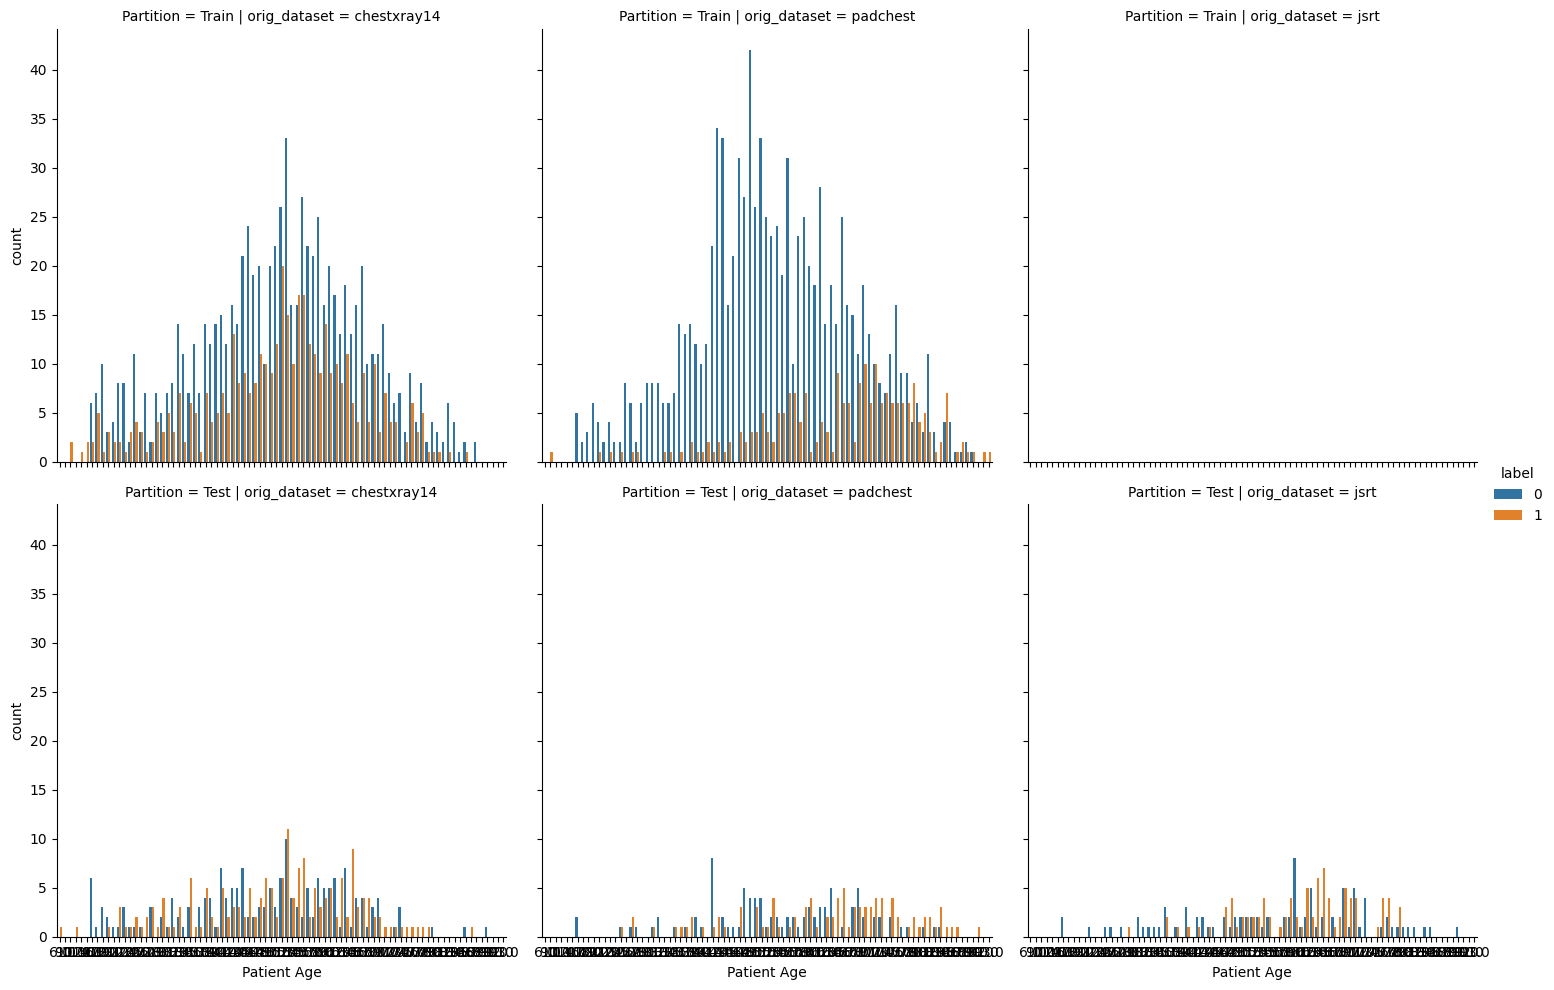

In [47]:
sns.catplot(
    data=meta_df[meta_df["Patient Age"].notnull()].query("Partition != 'None'"),
    x="Patient Age",
    hue="label",
    row="Partition",
    col="orig_dataset",
    kind="count",
)

<AxesSubplot:xlabel='Patient Age', ylabel='Count'>

/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument

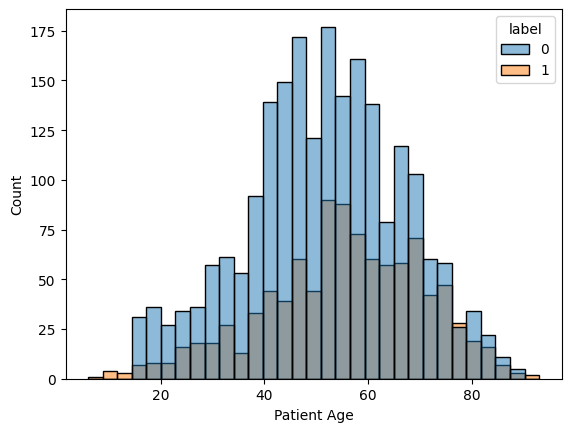

In [49]:
sns.histplot(
    data=meta_df[meta_df["Patient Age"].notnull()].query("Partition != 'None'"),
    x = 'Patient Age',
    hue='label',

)

In [11]:
meta_df.columns

Index(['original_image_name', 'orig_dataset', 'label', 'mha', 'Finding Labels',
       'Patient ID', 'Patient Age', 'Patient Gender', 'original_image_width',
       'original_image_height', 'Pneumothorax', 'Cardiomegaly', 'Nodule',
       'orig_bbox_x', 'orig_bbox_y', 'orig_bbox_width', 'orig_bbox_height',
       'shared_image_width', 'shared_image_height', 'Study Year',
       'Manufacturer', 'Modality', 'subtlety', 'nodule_size', 'malignant'],
      dtype='object')

In [16]:
meta_df[['Patient Age', 'original_image_width','Pneumothorax','Cardiomegaly', 'Study Year', 'subtlety', 'nodule_size', ]].describe()

,Patient Age,original_image_width,Pneumothorax,Cardiomegaly,Study Year,subtlety,nodule_size
count,3724.000000,3484.000000,1804.000000,1804.000000,1680.000000,149.000000,149.000000
mean,52.850430,2520.526406,0.011086,0.003326,2014.116071,2.859060,16.691275
std,15.173079,544.253730,0.104736,0.057591,2.395445,1.168391,6.185095
min,6.000000,1356.000000,0.000000,0.000000,2009.000000,1.000000,6.000000
25%,43.000000,2048.000000,0.000000,0.000000,2013.000000,2.000000,12.000000
50%,53.000000,2500.000000,0.000000,0.000000,2015.000000,3.000000,15.000000
75%,64.000000,2890.500000,0.000000,0.000000,2016.000000,4.000000,20.000000
max,93.000000,4280.000000,1.000000,1.000000,2017.000000,5.000000,30.000000


In [12]:
meta_df.Pneumothorax.unique()

array([ 0.,  1., nan])

In [4]:
# load model

In [5]:
# load data